# Summary
鍵ステータス情報の異常値検出がメインタスク．  
ここでは，$k$-means法により鍵ステータス情報をクラスタリングする．

## データプロット
`key_info_20181102.csv`を使用

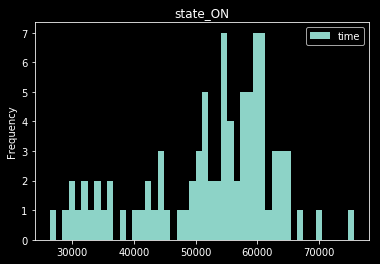

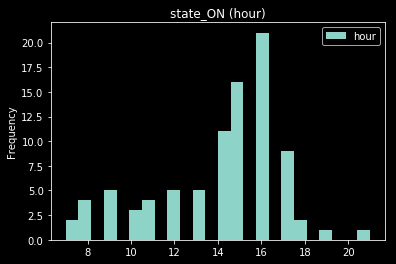

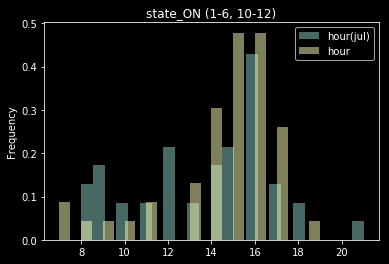

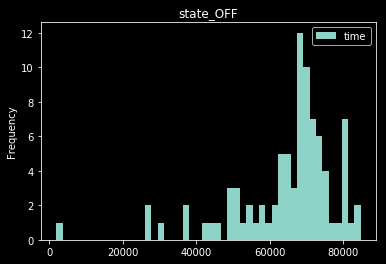

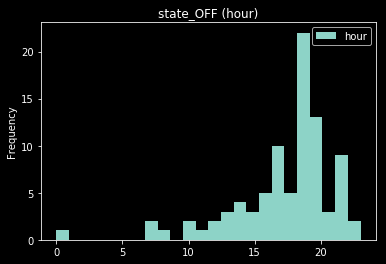

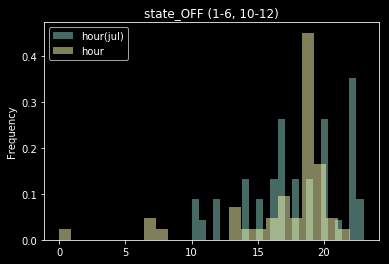

In [80]:
# coding: utf-8
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

def plot_datasets(datasets_path: str):
    # load datasets with pd
    df = pd.read_csv(datasets_path)
    
    # rename time to dtime
    df.rename(columns={'time': 'dtime'}, inplace=True)
    
    # convert dtime string to dtime format, and set to index
    df['dtime'] = pd.to_datetime(df['dtime'])
    df.set_index('dtime', inplace=True)
    
    # convert timezone to Asia/Tokyo
    df.index = df.index.tz_localize('UTC').tz_convert('Asia/Tokyo')
    
    # create time, hour, month column
    df['time'] = list(pd.Series(df.index).apply(lambda x: ((x.hour * 60 + x.minute) * 60 + x.second)))
    df['hour'] = list(pd.Series(df.index).apply(lambda x: x.hour))
    df['month'] = list(pd.Series(df.index).apply(lambda x: x.month))
    
    # convert state to int
    dummy_df = pd.get_dummies(df, columns=['state'])

    # plot hist if status is on
    dummy_df.query('state_ON == 1').plot(kind='hist', y='time', bins=48, title='state_ON')
    dummy_df.query('state_ON == 1').plot(kind='hist', y='hour', bins=24, title='state_ON (hour)')
    on_part_jul = dummy_df.query('state_ON == 1 and (month >= 7 and month >= 9)').plot(kind='hist', y='hour', label="hour(jul)", bins=24, title='state_ON (7-9)', alpha=0.5, normed=1)
    on_part_not_jul = dummy_df.query('state_ON == 1 and (month < 7 or month < 9)').plot(kind='hist', y='hour', bins=24, title='state_ON (1-6, 10-12)', alpha=0.5, ax=on_part_jul, normed=1)
    
    # plot hist if status is off
    dummy_df.query('state_OFF == 1').plot(kind='hist', y='time', bins=48, title='state_OFF')
    dummy_df.query('state_OFF == 1').plot(kind='hist', y='hour', bins=24, title='state_OFF (hour)')
    off_part_jul = dummy_df.query('state_OFF == 1 and (month >= 7 and month >= 9)').plot(kind='hist', y='hour', label="hour(jul)", bins=24, title='state_OFF (7-9)', alpha=0.5, normed=1)
    off_part_not_jul = dummy_df.query('state_OFF == 1 and (month < 7 or month < 9)').plot(kind='hist', y='hour', bins=24, title='state_OFF (1-6, 10-12)', alpha=0.5, ax=off_part_jul, normed=1)

    
def main():
    # params
    datasets_path = "./key_info_20181102.csv"
    
    # change plt style
    plt.style.use('dark_background')

    plot_datasets(datasets_path)
    
if __name__ == "__main__":
    main()